# XOR Problem in Deep Neural Network
> In this post, it will be mentioned about Basic Concept of Deep Neural Network, and covered XOR problems with Deep Neural Network.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Deep_Learning]
- image: images/linearly_separable_xor.png

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['text.usetex'] = True
plt.rc('font', size=15)

## Linearly Separable
Neurons, one of the basic elements in Neural Network are very similar with its in biology. When the input or signal is entered into synapse, cell nucleus interprets the information contained in signals and generates the output through Axon. similiarily, almost same operation happens in neurons in Neural Network. When the other axon sends the output, that is the input of next neurons ($x$), cell body interprets its information with embedded weight vector and bias($W, b$). Then, activation function filters information and send it to next neuron.

Actually, we already cover the concepts, and its implementation with tensorflow. But let's review the basic problem with simple examples.
 If your major is from EECS, you may heard about Logic Gates. Basic logic is AND and OR gates and have a following properties,
 
 - AND
 
| $x_1$   	| $x_2$  	| $y$  	|
|---	|---	|---	|
| 0  	| 0  	| 0  	|
| 0  	| 1  	| 0  	|
| 1  	| 0  	| 0  	|
| 1  	| 1  	| 1  	|


- OR

| $x_1$   	| $x_2$  	| $y$  	|
|---	|---	|---	|
| 0  	| 0  	| 0  	|
| 0  	| 1  	| 1  	|
| 1  	| 0  	| 1  	|
| 1  	| 1  	| 1  	|

And we can draw the graph of AND/OR like this,

![linearly_separable_and_or](image/linearly_separable_and_or.png)

Note that, black one is 1, white one is 0. Then if we want to separate it by two, we can easily do it by drawing the straight line, In this case, if we can separate the given data by drawing the line, we can call **"the linearly separable"**. But how about XOR case? (also known as eXclusive OR)

- XOR

| $x_1$   	| $x_2$  	| $y$  	|
|---	|---	|---	|
| 0  	| 0  	| 0  	|
| 0  	| 1  	| 1  	|
| 1  	| 0  	| 1  	|
| 1  	| 1  	| 0  	|

And the plot is like this,

![linearly_separable_xor](image/linearly_separable_xor.png)

Can we separate it with same manner in linearly separable? Maybe you cannot. In this kind of **Non-linearly separable** data cannot be separated by the linear equation. 

For this purpose, [Marvin Minsky](https://en.wikipedia.org/wiki/Marvin_Minsky), the co-founder of the MIT AI Lab, proved that Machine Learning tools cannot solve the Non-linearly separable case through his book "perceptrons". Instead, the book said that it could be solved with the hierachical architecture of Multiple perceptrons, so called **Multi-Layered Perceptron**(MLP for short). But in that time, there was no concepts for training, such as updating weights and bias, and optimization methods, and so on. So most of one thought that it is impossible to train the network.

## Backpropagation
In 1970, [Paul Werbos](https://en.wikipedia.org/wiki/Paul_Werbos) describes the **backpropagation** in his dissertation. And it helps to handle the problem mentioned previously.

![backpropagation](image/training_inference1.png)[^1]

Backpropagation is one of approaches to update weights using error. When the input is coming into the input layer, the process is executed with forward direction and gets inference. There maybe some errors comparing inferenced output and actual output, Based on this error, the process is excuted with backward direction for the weight update. Then updated weight is used in next step. 

This approach is re-discovered by [Geoffrey Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton) in mid-80's.

## Convolutional Neural Networks
In other case, there is another approach to handle non-linearly separable problem, especially on visual data. Someone found out that there is some general patterns of cell operation in optics, Imitated from the process of optic cell, Yann LeCun introduced **Convolutional Neural Network** (CNN for short) with his network LeNet-5, and showed the efficiency in handwriting recognition.

![lenet5](image/LeNet_Original_Image.jpg)

Unlike the operation in MLP, CNN compressed the input signal and handle it as a feature of visual data.

## The problems

These approaches like backpropagation and CNN improves the AI technology, but still remains the problem in architecture. If we want to gather lots of information from the features, it requires some numbers of layers. But when the number of network layer is increased, the errors that need for backpropagation is vanished, so called **Vanishing Gradient**. Because each of the neural network's weight receive an update proportional to the partial derivate of the error function. If the number of layer is increased, the order of gradient is also increased, then error might be vanished.


## Breakthrough
But in 2006, Hinton and Bengio found out that the neural networks with many layers could be trained well through **weight initialization**. Previously, there is no rule for weights, so usually it initialized randomly. Thanks to this approach, deep machine learning methods are more efficient for difficult problems than shallow models. Actually, The word **"Deep"** in Deep Learning means the learning architecture with some numbers of layers.

So this is the beginning of AI era!

## Backpropagation in details
Let's dive into backpropagation with simple example.

As you saw from previous sections, model is executed with forward-propagation and update the weight and bias with backpropation. Suppose we have a single neuron,

$$ f = WX + b $$

but we can separte with two function $f$ and $g$,

$$g = WX, \qquad f = g+b $$

Can we update the weight with backpropagation? To do this, we need to differentiate the parameters, but function $f$ consists of some variables, not a single variable. In this case, we can apply the partial derivative for each variables. Partial derivative is differentiation method that consider other varibles as constants and just focus on specific variables. In case of $g$, there are two variables $W$ and $X$. So we can apply the partial derivative for each $W$ and $X$,

$$ \frac{\partial g}{\partial W} =X, \qquad \frac{\partial g}{\partial X} = W $$

Also, we can apply it with $f$ for each $g$ and $b$,

$$ \frac{\partial f}{\partial g} = 1, \qquad \frac{\partial f}{\partial b} = 1 $$

So how can we calculate the partial derivative of $f$ in terms of $W$? It's simple. Just multiply two terms,

$$ \frac{\partial f}{\partial W} = \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial W} = X $$

This multiplication of partial derivatives is called **chain rule**. Of course, this is too easy case. We can directly apply function $g$ in $f$, and do partial derivatives of $f$ with respect to $W$. But what if the neural network consists of several numbers of layers? As you know, to solve the non-linearly separable classification requires neurons with layers. So directly applying the previous neurons into the next layer and applying the partial derivatives may be difficult. 

Thanks to the chain rule, we just need to calculate the differentiate of each layers and multiply it. this is the short introdunction of backpropagation.

Actually, vanishing gradient problem occurs because of chain rules. When the number of layers is increased, the number of execution partial derivatives multiplication is also increased. Suppose that first order partial derivatives is less than 1, then multiplication with next step partial derivatives will go down, and finally it goes toward 0. We just want to know the differentiation of variables with respect to weight, but the overall partial derivative (after multiplying all derivatives) may be very small, and it is hard to update weight from error.

## Neural Networks for XOR in tensorflow
So Let's implement it with tensorflow. In this example, we will build 2 layer neural network.

![neural network](image/neural_network.png)

Implementation is like this,

In [51]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

Note that the input of second layer are the output of previous layer, so it requires to concatenate each output by 1.

Anyway, we generate the XOR dataset.

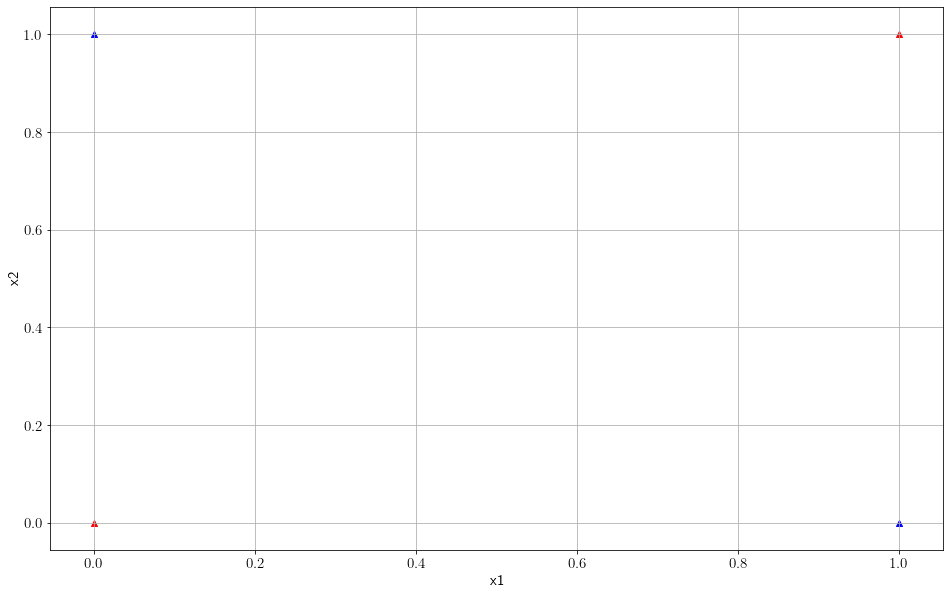

In [52]:
X = [[0, 0],
     [0, 1],
     [1, 0],
     [1, 1]]

y = [[0],
     [1],
     [1],
     [0]]

plt.scatter(X[0][0],X[0][1], c='red' , marker='^')
plt.scatter(X[3][0],X[3][1], c='red' , marker='^')
plt.scatter(X[1][0],X[1][1], c='blue' , marker='^')
plt.scatter(X[2][0],X[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

# Convert iw with float32
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(len(X))

And initialize the weights and biases.

In [53]:
tf.random.set_seed(777)

W1 = tf.Variable(tf.random.normal([2, 1]), name='weight1')
b1 = tf.Variable(tf.random.normal([1]), name='bias1')

W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

W3 = tf.Variable(tf.random.normal([2, 1]), name='weight3')
b3 = tf.Variable(tf.random.normal([1]), name='bias3')

Then, we build the loss function and training process.

In [54]:
# Loss function
def loss_fn(h, y):
    cost = -tf.reduce_mean(y * tf.math.log(h) + (1 - y) * tf.math.log(1 - h))
    return cost

# Gradient function
def grad(X, y):
    with tf.GradientTape() as tape:
        h = neural_net(X)
        losses = loss_fn(h, y)
    return tape.gradient(losses, [W1, W2, W3, b1, b2, b3])

# Accuracy function
def accuracy_fn(h, y):
    predict = tf.cast(h > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y), dtype=tf.float32))
    return accuracy

In [55]:


## Optimizer: Stochastic Gradient Descent with learning rate 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

for e in range(50000):
    for X, y in dataset:
        grads = grad(X, y)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W1, W2, W3, b1, b2, b3]))
        if e % 5000 == 0:
            print("Epoch: {}, Loss: {:.4f}".format(e, loss_fn(neural_net(X), y)))

Epoch: 0, Loss: 0.8487
Epoch: 5000, Loss: 0.6847
Epoch: 10000, Loss: 0.6610
Epoch: 15000, Loss: 0.6154
Epoch: 20000, Loss: 0.5722
Epoch: 25000, Loss: 0.5433
Epoch: 30000, Loss: 0.5211
Epoch: 35000, Loss: 0.4911
Epoch: 40000, Loss: 0.4416
Epoch: 45000, Loss: 0.3313


After training, we can get trained weight and bias, so we apply it with accuracy function

In [57]:
accuracy = accuracy_fn(neural_net(X), y)
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 1.0000


## Summary
Through this post, we covered the case of XOR problem, and it cannot handle with single perceptron. Through weight and bias update via backpropagation helps to solve this, and requires numbers of layers. Also we tried to implement in tensorflow for simple XOR problem.

[^1]: Figure from [nvidia blogs](https://developer.nvidia.com/blog/inference-next-step-gpu-accelerated-deep-learning/)